In [1]:
import pandas as pd
import numpy as np

import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bb_data = pd.read_csv('baseball_data.csv')

In [3]:
bb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 6 columns):
name          1157 non-null object
handedness    1157 non-null object
height        1157 non-null int64
weight        1157 non-null int64
avg           1157 non-null float64
HR            1157 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 45.2+ KB


In [4]:
bb_data.head()

,name,handedness,height,weight,avg,HR
0,Tom Brown,R,73,170,0.000,0
1,Denny Lemaster,R,73,182,0.130,4
2,Joe Nolan,L,71,175,0.263,27
3,Denny Doyle,L,69,175,0.250,16
4,Jose Cardenal,R,70,150,0.275,138


In [5]:
bb_data.describe()

,height,weight,avg,HR
count,1157.000000,1157.000000,1157.000000,1157.000000
mean,72.756266,184.513397,0.186793,45.359551
std,2.142272,15.445995,0.106175,74.065110
min,65.000000,140.000000,0.000000,0.000000
25%,71.000000,175.000000,0.138000,1.000000
50%,73.000000,185.000000,0.238000,15.000000
75%,74.000000,195.000000,0.258000,55.000000
max,80.000000,245.000000,0.328000,563.000000


In [6]:
weight_cat = bb_data["weight"].value_counts()
weight_cat = weight_cat.to_dict()

In [7]:
bb_data["weight_HR_mean"] = np.nan
bb_data["weight_counts"] = np.nan

In [12]:
## df_poi[email_columns] = df_poi[email_columns].fillna(df_poi[email_columns].mean())

for k in weight_cat.keys():
    w = k
    for h in ['B', 'L', 'R']:
        locations = bb_data[(bb_data["weight"] == w) & (bb_data['handedness'] == h)].any(axis=1)
        mean = bb_data[(bb_data["weight"] == w) & (bb_data['handedness'] == h)]["HR"].mean()
        loc_index = locations.index
        for i in loc_index:
            bb_data.loc[i, "weight_HR_mean"] = mean
            bb_data.loc[i, "weight_counts"] = weight_cat[k]
            
            

In [9]:
bb_data.to_csv("new_bb_data.csv", encoding='utf-8', index=False)

In [10]:
bb_bh = bb_data[bb_data["handedness"] == 'B']
bb_lh = bb_data[bb_data["handedness"] == 'L']
bb_rh = bb_data[bb_data["handedness"] == 'R']

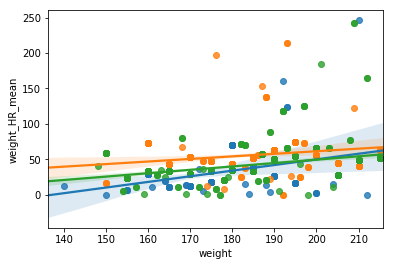

In [11]:
import seaborn as sns
sns.regplot(bb_bh['weight'],bb_bh['weight_HR_mean'])
sns.regplot(bb_lh['weight'],bb_lh['weight_HR_mean'])
sns.regplot(bb_rh['weight'],bb_rh['weight_HR_mean'])